In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import missingno as msno 

In [60]:
data_path = 'N:\SE\EDX\IBMDataAnalysis\l.xlsx'
df = pd.read_excel(data_path)
df

,Unnamed: 0,Patient,Gender,Age,Race,Ethnicity,Birthdate,Induction Date,12 Months,15 Months,18 Months,21 Months,24 Months,Induction,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,12 Months.1,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,15 Months.1,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,18 Months.1,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,21 Months.1,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,24 Months.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Row #
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,Sensory,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,NaN
1,43.0,GW-04,m,14.0,Black,Not Hispanic or Latino,1996-10-16,2011-03-08,2012-02-06,2012-05-29,2012-09-19,2012-12-19,2013-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0,0,0,0,2,3,0,2,7,0,0,0,0,2,2,1,2,7,0,0,0,0,3,2,0,4,9,NaN
2,51.0,GW-05,f,5.0,White,Hispanic or Latino,2006-08-15,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,5.02,0,0,0,0,0,0,1,4,5,0,0,0,0,1,1,1,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.59,2,0,2,0,3,2,1,4,12,NaN
3,54.0,GW-06,f,14.0,White,Not Hispanic or Latino,1996-11-22,2011-08-05,2012-08-06,2012-10-26,2013-01-28,2013-04-22,2013-05-20,0,0,0,0,0,0,0,2,0,0,2,3,4,4,13,4,4,4,4,3,3,4,4,18,3,3,3,0,3,3,4,4,17,3,3,3,0,3,3,4,4,17,4,4,3,0,2,4,3,4,17,NaN
4,72.0,GW-08,m,9.0,none,Not Hispanic or Latino,2002-01-01,2011-12-21,2012-01-03,2012-01-03,NaT,NaT,NaT,0,0,0,0,0,0,0,1,0,0,2,0,0,4,6,0,NaN,NaN,NaN,2,0,0,0,7.48,0,0,0,0,2,2,0,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.99,NaN
5,81.0,GW-11,f,12.0,Black,Not Hispanic or Latino,1999-11-07,2012-05-04,2013-06-28,2014-06-28,NaT,2014-02-28,NaT,0,2,0,1,2,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.49,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,NaN
6,96.0,GW-13,f,7.0,White,Not Hispanic or Latino,2005-07-07,2012-08-06,2013-09-03,NaT,2014-01-21,2014-04-14,2014-08-05,0,1,2,0,1,4,1.6,0,0,0,2,1,1,2,7.6,0,0,0,0,2,2,0,2,6,0,0,0,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.59,0,0,0,0,3,1,0,4,8,NaN
7,107.0,GW-14,m,9.0,none,Hispanic or Latino,2003-04-21,2012-09-17,NaT,2013-11-26,NaT,2014-06-09,NaT,0,0,0,0,1,1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.55,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2,2,0,0,0,0,0,2,4,NaN
8,142.0,GW-17,m,5.0,White,Not Hispanic or Latino,2007-07-23,2013-03-11,2014-02-28,2014-05-28,NaT,NaT,NaT,0,0,0,0,3,3,1.2,0,0,0,2,2,1,4,10.2,0,0,0,0,2,0,1,3,6,0,0,0,0,3,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.46,NaN
9,153.0,GW-19,m,5.0,White,Not Hispanic or Latino,2007-12-14,2013-07-26,2014-08-11,2014-11-11,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,2,2,0,4,8,0,0,0,0,3,3,0,4,10,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.53,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.16,NaN


In [61]:
df.columns

Index(['Unnamed: 0', 'Patient', 'Gender', 'Age', 'Race', 'Ethnicity',
       'Birthdate', 'Induction Date', '12 Months', '15 Months', '18 Months',
       '21 Months', '24 Months', 'Induction', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', '12 Months.1',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       '15 Months.1', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', '18 Months.1', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', '21 Months.1', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', '24 Months.1',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Un

In [62]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [63]:
df

,Unnamed: 0,Patient,Gender,Age,Race,Ethnicity,Birthdate,Induction Date,12 Months,15 Months,18 Months,21 Months,24 Months,Induction,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,12 Months.1,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,15 Months.1,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,18 Months.1,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,21 Months.1,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,24 Months.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Row #
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,Sensory,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,NaN
1,43.0,GW-04,m,14.0,Black,Not Hispanic or Latino,1996-10-16,2011-03-08,2012-02-06,2012-05-29,2012-09-19,2012-12-19,2013-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0,0,0,0,2,3,0,2,7,0,0,0,0,2,2,1,2,7,0,0,0,0,3,2,0,4,9,NaN
2,51.0,GW-05,f,5.0,White,Hispanic or Latino,2006-08-15,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,5.02,0,0,0,0,0,0,1,4,5,0,0,0,0,1,1,1,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.59,2,0,2,0,3,2,1,4,12,NaN
3,54.0,GW-06,f,14.0,White,Not Hispanic or Latino,1996-11-22,2011-08-05,2012-08-06,2012-10-26,2013-01-28,2013-04-22,2013-05-20,0,0,0,0,0,0,0,2,0,0,2,3,4,4,13,4,4,4,4,3,3,4,4,18,3,3,3,0,3,3,4,4,17,3,3,3,0,3,3,4,4,17,4,4,3,0,2,4,3,4,17,NaN
4,72.0,GW-08,m,9.0,none,Not Hispanic or Latino,2002-01-01,2011-12-21,2012-01-03,2012-01-03,NaT,NaT,NaT,0,0,0,0,0,0,0,1,0,0,2,0,0,4,6,0,NaN,NaN,NaN,2,0,0,0,7.48,0,0,0,0,2,2,0,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.99,NaN
5,81.0,GW-11,f,12.0,Black,Not Hispanic or Latino,1999-11-07,2012-05-04,2013-06-28,2014-06-28,NaT,2014-02-28,NaT,0,2,0,1,2,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.49,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,NaN
6,96.0,GW-13,f,7.0,White,Not Hispanic or Latino,2005-07-07,2012-08-06,2013-09-03,NaT,2014-01-21,2014-04-14,2014-08-05,0,1,2,0,1,4,1.6,0,0,0,2,1,1,2,7.6,0,0,0,0,2,2,0,2,6,0,0,0,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.59,0,0,0,0,3,1,0,4,8,NaN
7,107.0,GW-14,m,9.0,none,Hispanic or Latino,2003-04-21,2012-09-17,NaT,2013-11-26,NaT,2014-06-09,NaT,0,0,0,0,1,1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.55,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2,2,0,0,0,0,0,2,4,NaN
8,142.0,GW-17,m,5.0,White,Not Hispanic or Latino,2007-07-23,2013-03-11,2014-02-28,2014-05-28,NaT,NaT,NaT,0,0,0,0,3,3,1.2,0,0,0,2,2,1,4,10.2,0,0,0,0,2,0,1,3,6,0,0,0,0,3,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.46,NaN
9,153.0,GW-19,m,5.0,White,Not Hispanic or Latino,2007-12-14,2013-07-26,2014-08-11,2014-11-11,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,2,2,0,4,8,0,0,0,0,3,3,0,4,10,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.53,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.16,NaN


In [64]:
df.describe()

,Unnamed: 0,Age,Row #
count,77.000000,77.000000,0.0
mean,100.519481,8.311688,NaN
std,73.844005,3.819134,NaN
min,1.000000,5.000000,NaN
25%,51.000000,5.000000,NaN
50%,83.000000,7.000000,NaN
75%,125.000000,10.000000,NaN
max,295.000000,19.000000,NaN


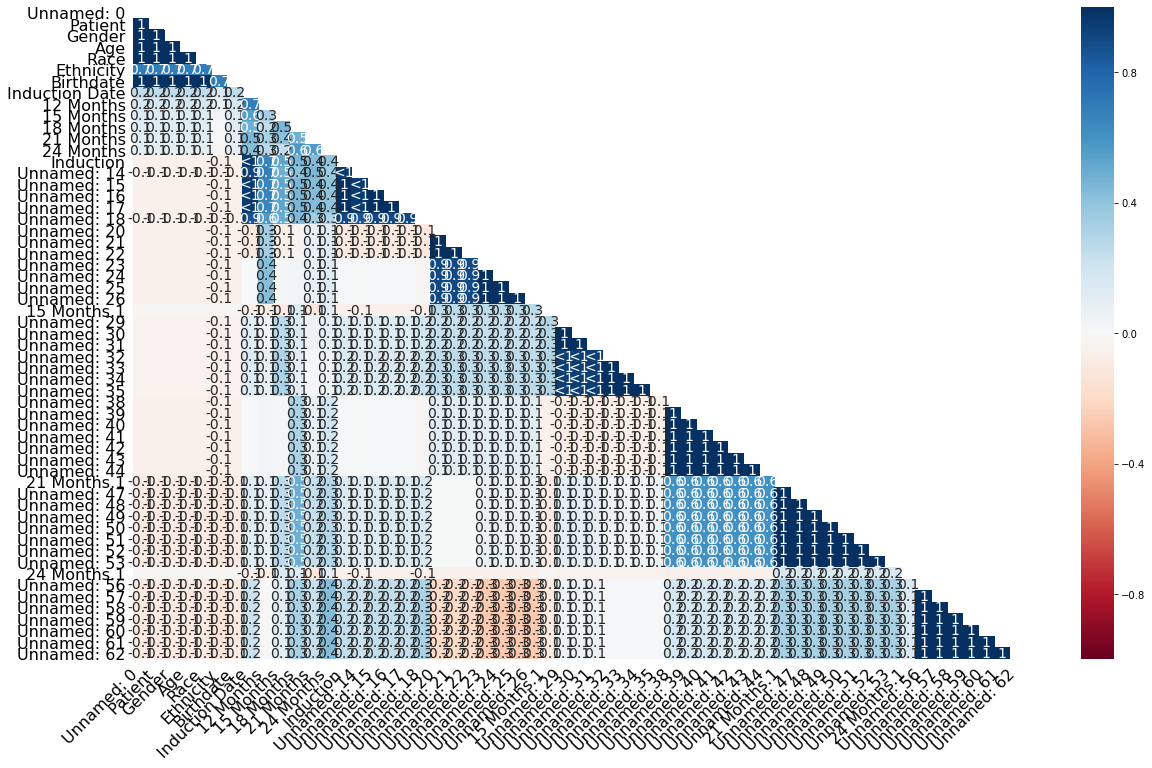

In [65]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(df) 

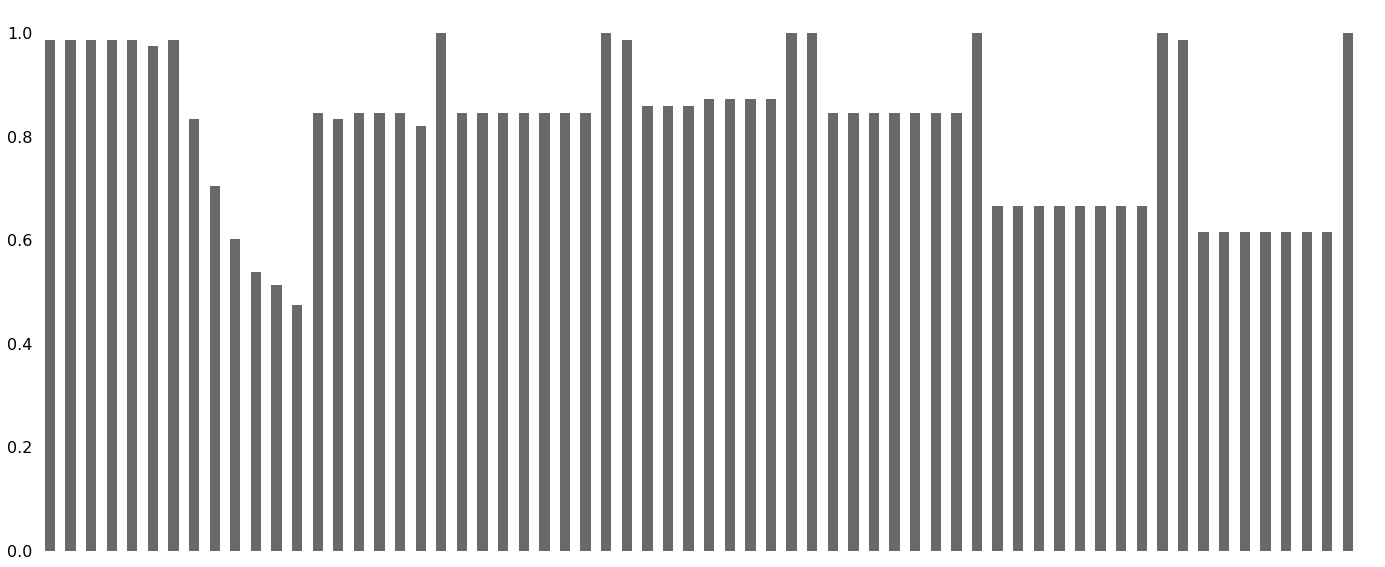

In [66]:
msno.bar(df) 


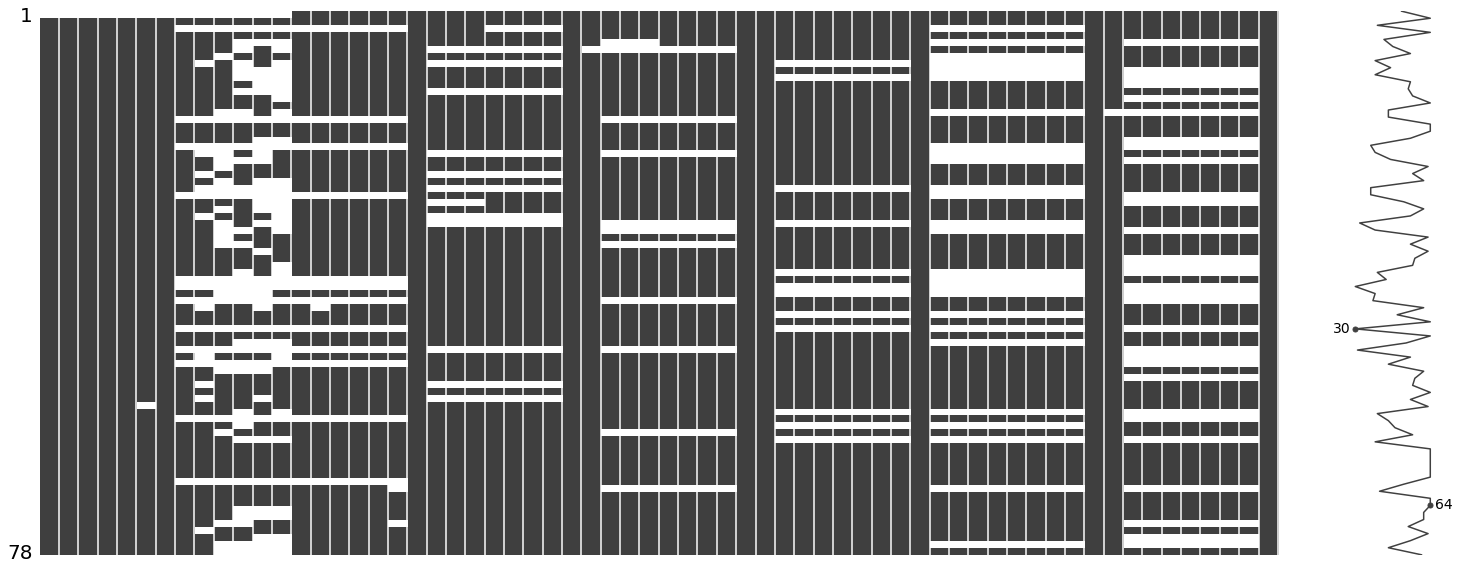

In [67]:
msno.matrix(df) 

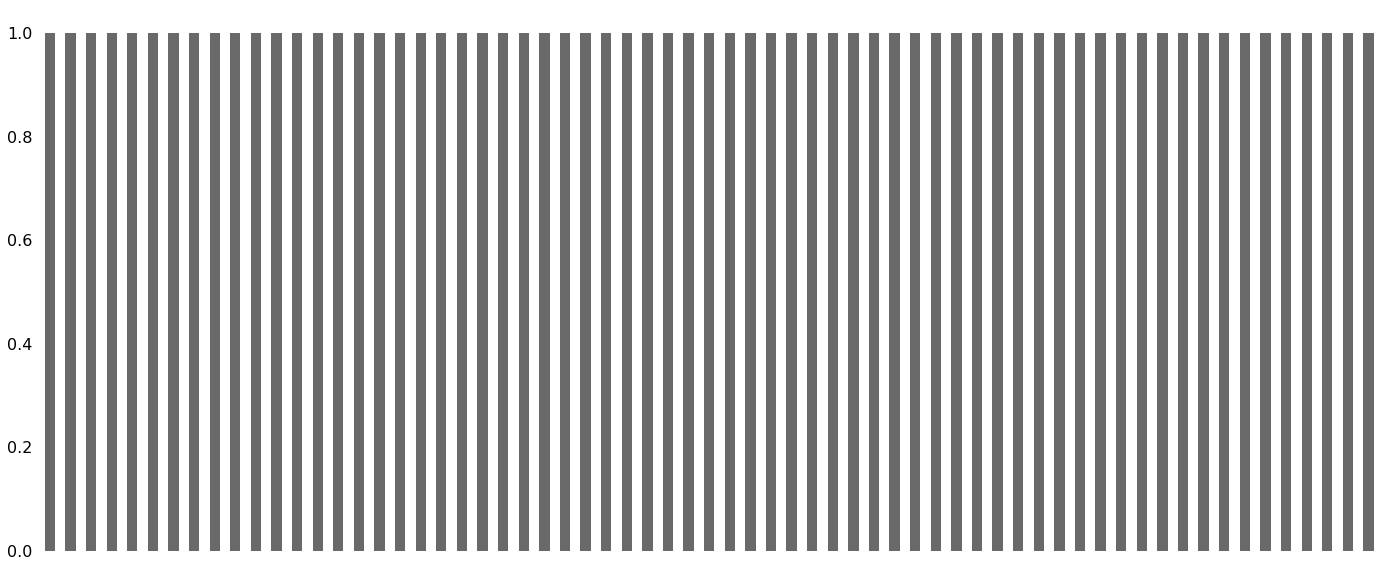

In [68]:
df1=pd.DataFrame.fillna(df,0,axis=0)
msno.bar(df1) 

In [69]:
df1[0:10]

,Unnamed: 0,Patient,Gender,Age,Race,Ethnicity,Birthdate,Induction Date,12 Months,15 Months,18 Months,21 Months,24 Months,Induction,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,12 Months.1,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,15 Months.1,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,18 Months.1,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,21 Months.1,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,24 Months.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Row #
0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,Sensory,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,0.0
1,43.0,GW-04,m,14.0,Black,Not Hispanic or Latino,1996-10-16 00:00:00,2011-03-08 00:00:00,2012-02-06 00:00:00,2012-05-29 00:00:00,2012-09-19 00:00:00,2012-12-19 00:00:00,2013-03-13 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0,0,0,0,2,3,0,2,7,0,0,0,0,2,2,1,2,7,0,0,0,0,3,2,0,4,9,0.0
2,51.0,GW-05,f,5.0,White,Hispanic or Latino,2006-08-15 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.02,0,0,0,0,0,0,1,4,5,0,0,0,0,1,1,1,4,7,0,0,0,0,0,0,0,0,6.59,2,0,2,0,3,2,1,4,12,0.0
3,54.0,GW-06,f,14.0,White,Not Hispanic or Latino,1996-11-22 00:00:00,2011-08-05 00:00:00,2012-08-06 00:00:00,2012-10-26 00:00:00,2013-01-28 00:00:00,2013-04-22 00:00:00,2013-05-20 00:00:00,0,0,0,0,0,0,0,2,0,0,2,3,4,4,13,4,4,4,4,3,3,4,4,18,3,3,3,0,3,3,4,4,17,3,3,3,0,3,3,4,4,17,4,4,3,0,2,4,3,4,17,0.0
4,72.0,GW-08,m,9.0,none,Not Hispanic or Latino,2002-01-01 00:00:00,2011-12-21 00:00:00,2012-01-03 00:00:00,2012-01-03 00:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,4,6,0,0,0,0,2,0,0,0,7.48,0,0,0,0,2,2,0,4,8,0,0,0,0,0,0,0,0,8.08,0,0,0,0,0,0,0,0,9.99,0.0
5,81.0,GW-11,f,12.0,Black,Not Hispanic or Latino,1999-11-07 00:00:00,2012-05-04 00:00:00,2013-06-28 00:00:00,2014-06-28 00:00:00,0,2014-02-28 00:00:00,0,0,2,0,1,2,5,2,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0.0
6,96.0,GW-13,f,7.0,White,Not Hispanic or Latino,2005-07-07 00:00:00,2012-08-06 00:00:00,2013-09-03 00:00:00,0,2014-01-21 00:00:00,2014-04-14 00:00:00,2014-08-05 00:00:00,0,1,2,0,1,4,1.6,0,0,0,2,1,1,2,7.6,0,0,0,0,2,2,0,2,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.59,0,0,0,0,3,1,0,4,8,0.0
7,107.0,GW-14,m,9.0,none,Hispanic or Latino,2003-04-21 00:00:00,2012-09-17 00:00:00,0,2013-11-26 00:00:00,0,2014-06-09 00:00:00,0,0,0,0,0,1,1,0.4,0,0,0,0,0,0,0,2.55,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.39,0,0,0,0,0,0,0,0,2.7,2,2,0,0,0,0,0,2,4,0.0
8,142.0,GW-17,m,5.0,White,Not Hispanic or Latino,2007-07-23 00:00:00,2013-03-11 00:00:00,2014-02-28 00:00:00,2014-05-28 00:00:00,0,0,0,0,0,0,0,3,3,1.2,0,0,0,2,2,1,4,10.2,0,0,0,0,2,0,1,3,6,0,0,0,0,3,1,1,1,6,0,0,0,0,0,0,0,0,8.14,0,0,0,0,0,0,0,0,8.46,0.0
9,153.0,GW-19,m,5.0,White,Not Hispanic or Latino,2007-12-14 00:00:00,2013-07-26 00:00:00,2014-08-11 00:00:00,2014-11-11 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,4,8,0,0,0,0,3,3,0,4,10,3.23,0,0,0,0,0,0,0,12.27,0,0,0,0,0,0,0,0,9.53,0,0,0,0,0,0,0,0,13.16,0.0


In [70]:
pd.DataFrame.replace(df1, to_replace="Unnamed:")

,Unnamed: 0,Patient,Gender,Age,Race,Ethnicity,Birthdate,Induction Date,12 Months,15 Months,18 Months,21 Months,24 Months,Induction,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,12 Months.1,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,15 Months.1,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,18 Months.1,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,21 Months.1,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,24 Months.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Row #
0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,Sensory,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,0.0
1,43.0,GW-04,m,14.0,Black,Not Hispanic or Latino,1996-10-16 00:00:00,2011-03-08 00:00:00,2012-02-06 00:00:00,2012-05-29 00:00:00,2012-09-19 00:00:00,2012-12-19 00:00:00,2013-03-13 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0,0,0,0,2,3,0,2,7,0,0,0,0,2,2,1,2,7,0,0,0,0,3,2,0,4,9,0.0
2,51.0,GW-05,f,5.0,White,Hispanic or Latino,2006-08-15 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.02,0,0,0,0,0,0,1,4,5,0,0,0,0,1,1,1,4,7,0,0,0,0,0,0,0,0,6.59,2,0,2,0,3,2,1,4,12,0.0
3,54.0,GW-06,f,14.0,White,Not Hispanic or Latino,1996-11-22 00:00:00,2011-08-05 00:00:00,2012-08-06 00:00:00,2012-10-26 00:00:00,2013-01-28 00:00:00,2013-04-22 00:00:00,2013-05-20 00:00:00,0,0,0,0,0,0,0,2,0,0,2,3,4,4,13,4,4,4,4,3,3,4,4,18,3,3,3,0,3,3,4,4,17,3,3,3,0,3,3,4,4,17,4,4,3,0,2,4,3,4,17,0.0
4,72.0,GW-08,m,9.0,none,Not Hispanic or Latino,2002-01-01 00:00:00,2011-12-21 00:00:00,2012-01-03 00:00:00,2012-01-03 00:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,4,6,0,0,0,0,2,0,0,0,7.48,0,0,0,0,2,2,0,4,8,0,0,0,0,0,0,0,0,8.08,0,0,0,0,0,0,0,0,9.99,0.0
5,81.0,GW-11,f,12.0,Black,Not Hispanic or Latino,1999-11-07 00:00:00,2012-05-04 00:00:00,2013-06-28 00:00:00,2014-06-28 00:00:00,0,2014-02-28 00:00:00,0,0,2,0,1,2,5,2,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0.0
6,96.0,GW-13,f,7.0,White,Not Hispanic or Latino,2005-07-07 00:00:00,2012-08-06 00:00:00,2013-09-03 00:00:00,0,2014-01-21 00:00:00,2014-04-14 00:00:00,2014-08-05 00:00:00,0,1,2,0,1,4,1.6,0,0,0,2,1,1,2,7.6,0,0,0,0,2,2,0,2,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.59,0,0,0,0,3,1,0,4,8,0.0
7,107.0,GW-14,m,9.0,none,Hispanic or Latino,2003-04-21 00:00:00,2012-09-17 00:00:00,0,2013-11-26 00:00:00,0,2014-06-09 00:00:00,0,0,0,0,0,1,1,0.4,0,0,0,0,0,0,0,2.55,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.39,0,0,0,0,0,0,0,0,2.7,2,2,0,0,0,0,0,2,4,0.0
8,142.0,GW-17,m,5.0,White,Not Hispanic or Latino,2007-07-23 00:00:00,2013-03-11 00:00:00,2014-02-28 00:00:00,2014-05-28 00:00:00,0,0,0,0,0,0,0,3,3,1.2,0,0,0,2,2,1,4,10.2,0,0,0,0,2,0,1,3,6,0,0,0,0,3,1,1,1,6,0,0,0,0,0,0,0,0,8.14,0,0,0,0,0,0,0,0,8.46,0.0
9,153.0,GW-19,m,5.0,White,Not Hispanic or Latino,2007-12-14 00:00:00,2013-07-26 00:00:00,2014-08-11 00:00:00,2014-11-11 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,4,8,0,0,0,0,3,3,0,4,10,3.23,0,0,0,0,0,0,0,12.27,0,0,0,0,0,0,0,0,9.53,0,0,0,0,0,0,0,0,13.16,0.0


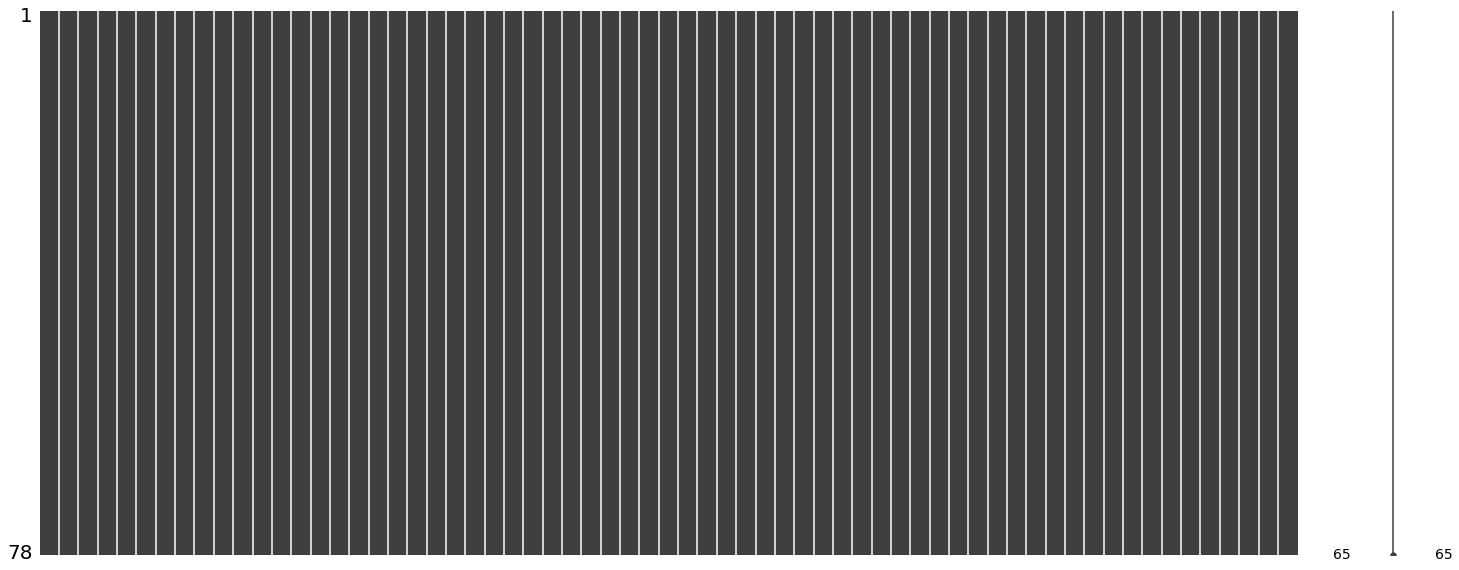

In [71]:
msno.matrix(df1) 

In [72]:
df1.shape

(78, 65)

In [73]:
df1.columns

Index(['Unnamed: 0', 'Patient', 'Gender', 'Age', 'Race', 'Ethnicity',
       'Birthdate', 'Induction Date', '12 Months', '15 Months', '18 Months',
       '21 Months', '24 Months', 'Induction', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', '12 Months.1',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       '15 Months.1', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', '18 Months.1', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', '21 Months.1', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', '24 Months.1',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Un

In [74]:
df1=df1.drop("Patient",axis=1)
df1

,Unnamed: 0,Gender,Age,Race,Ethnicity,Birthdate,Induction Date,12 Months,15 Months,18 Months,21 Months,24 Months,Induction,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,12 Months.1,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,15 Months.1,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,18 Months.1,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,21 Months.1,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,24 Months.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Row #
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,Sensory,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,0.0
1,43.0,m,14.0,Black,Not Hispanic or Latino,1996-10-16 00:00:00,2011-03-08 00:00:00,2012-02-06 00:00:00,2012-05-29 00:00:00,2012-09-19 00:00:00,2012-12-19 00:00:00,2013-03-13 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0,0,0,0,2,3,0,2,7,0,0,0,0,2,2,1,2,7,0,0,0,0,3,2,0,4,9,0.0
2,51.0,f,5.0,White,Hispanic or Latino,2006-08-15 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.02,0,0,0,0,0,0,1,4,5,0,0,0,0,1,1,1,4,7,0,0,0,0,0,0,0,0,6.59,2,0,2,0,3,2,1,4,12,0.0
3,54.0,f,14.0,White,Not Hispanic or Latino,1996-11-22 00:00:00,2011-08-05 00:00:00,2012-08-06 00:00:00,2012-10-26 00:00:00,2013-01-28 00:00:00,2013-04-22 00:00:00,2013-05-20 00:00:00,0,0,0,0,0,0,0,2,0,0,2,3,4,4,13,4,4,4,4,3,3,4,4,18,3,3,3,0,3,3,4,4,17,3,3,3,0,3,3,4,4,17,4,4,3,0,2,4,3,4,17,0.0
4,72.0,m,9.0,none,Not Hispanic or Latino,2002-01-01 00:00:00,2011-12-21 00:00:00,2012-01-03 00:00:00,2012-01-03 00:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,4,6,0,0,0,0,2,0,0,0,7.48,0,0,0,0,2,2,0,4,8,0,0,0,0,0,0,0,0,8.08,0,0,0,0,0,0,0,0,9.99,0.0
5,81.0,f,12.0,Black,Not Hispanic or Latino,1999-11-07 00:00:00,2012-05-04 00:00:00,2013-06-28 00:00:00,2014-06-28 00:00:00,0,2014-02-28 00:00:00,0,0,2,0,1,2,5,2,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0.0
6,96.0,f,7.0,White,Not Hispanic or Latino,2005-07-07 00:00:00,2012-08-06 00:00:00,2013-09-03 00:00:00,0,2014-01-21 00:00:00,2014-04-14 00:00:00,2014-08-05 00:00:00,0,1,2,0,1,4,1.6,0,0,0,2,1,1,2,7.6,0,0,0,0,2,2,0,2,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.59,0,0,0,0,3,1,0,4,8,0.0
7,107.0,m,9.0,none,Hispanic or Latino,2003-04-21 00:00:00,2012-09-17 00:00:00,0,2013-11-26 00:00:00,0,2014-06-09 00:00:00,0,0,0,0,0,1,1,0.4,0,0,0,0,0,0,0,2.55,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.39,0,0,0,0,0,0,0,0,2.7,2,2,0,0,0,0,0,2,4,0.0
8,142.0,m,5.0,White,Not Hispanic or Latino,2007-07-23 00:00:00,2013-03-11 00:00:00,2014-02-28 00:00:00,2014-05-28 00:00:00,0,0,0,0,0,0,0,3,3,1.2,0,0,0,2,2,1,4,10.2,0,0,0,0,2,0,1,3,6,0,0,0,0,3,1,1,1,6,0,0,0,0,0,0,0,0,8.14,0,0,0,0,0,0,0,0,8.46,0.0
9,153.0,m,5.0,White,Not Hispanic or Latino,2007-12-14 00:00:00,2013-07-26 00:00:00,2014-08-11 00:00:00,2014-11-11 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,4,8,0,0,0,0,3,3,0,4,10,3.23,0,0,0,0,0,0,0,12.27,0,0,0,0,0,0,0,0,9.53,0,0,0,0,0,0,0,0,13.16,0.0


In [75]:
df1=df1.drop("Unnamed: 0",axis=1)
df1

,Gender,Age,Race,Ethnicity,Birthdate,Induction Date,12 Months,15 Months,18 Months,21 Months,24 Months,Induction,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,12 Months.1,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,15 Months.1,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,18 Months.1,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,21 Months.1,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,24 Months.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Row #
0,0,0.0,0,0,0,0,0,0,0,0,0,Sensory,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,0.0
1,m,14.0,Black,Not Hispanic or Latino,1996-10-16 00:00:00,2011-03-08 00:00:00,2012-02-06 00:00:00,2012-05-29 00:00:00,2012-09-19 00:00:00,2012-12-19 00:00:00,2013-03-13 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0,0,0,0,2,3,0,2,7,0,0,0,0,2,2,1,2,7,0,0,0,0,3,2,0,4,9,0.0
2,f,5.0,White,Hispanic or Latino,2006-08-15 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.02,0,0,0,0,0,0,1,4,5,0,0,0,0,1,1,1,4,7,0,0,0,0,0,0,0,0,6.59,2,0,2,0,3,2,1,4,12,0.0
3,f,14.0,White,Not Hispanic or Latino,1996-11-22 00:00:00,2011-08-05 00:00:00,2012-08-06 00:00:00,2012-10-26 00:00:00,2013-01-28 00:00:00,2013-04-22 00:00:00,2013-05-20 00:00:00,0,0,0,0,0,0,0,2,0,0,2,3,4,4,13,4,4,4,4,3,3,4,4,18,3,3,3,0,3,3,4,4,17,3,3,3,0,3,3,4,4,17,4,4,3,0,2,4,3,4,17,0.0
4,m,9.0,none,Not Hispanic or Latino,2002-01-01 00:00:00,2011-12-21 00:00:00,2012-01-03 00:00:00,2012-01-03 00:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,4,6,0,0,0,0,2,0,0,0,7.48,0,0,0,0,2,2,0,4,8,0,0,0,0,0,0,0,0,8.08,0,0,0,0,0,0,0,0,9.99,0.0
5,f,12.0,Black,Not Hispanic or Latino,1999-11-07 00:00:00,2012-05-04 00:00:00,2013-06-28 00:00:00,2014-06-28 00:00:00,0,2014-02-28 00:00:00,0,0,2,0,1,2,5,2,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0.0
6,f,7.0,White,Not Hispanic or Latino,2005-07-07 00:00:00,2012-08-06 00:00:00,2013-09-03 00:00:00,0,2014-01-21 00:00:00,2014-04-14 00:00:00,2014-08-05 00:00:00,0,1,2,0,1,4,1.6,0,0,0,2,1,1,2,7.6,0,0,0,0,2,2,0,2,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.59,0,0,0,0,3,1,0,4,8,0.0
7,m,9.0,none,Hispanic or Latino,2003-04-21 00:00:00,2012-09-17 00:00:00,0,2013-11-26 00:00:00,0,2014-06-09 00:00:00,0,0,0,0,0,1,1,0.4,0,0,0,0,0,0,0,2.55,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.39,0,0,0,0,0,0,0,0,2.7,2,2,0,0,0,0,0,2,4,0.0
8,m,5.0,White,Not Hispanic or Latino,2007-07-23 00:00:00,2013-03-11 00:00:00,2014-02-28 00:00:00,2014-05-28 00:00:00,0,0,0,0,0,0,0,3,3,1.2,0,0,0,2,2,1,4,10.2,0,0,0,0,2,0,1,3,6,0,0,0,0,3,1,1,1,6,0,0,0,0,0,0,0,0,8.14,0,0,0,0,0,0,0,0,8.46,0.0
9,m,5.0,White,Not Hispanic or Latino,2007-12-14 00:00:00,2013-07-26 00:00:00,2014-08-11 00:00:00,2014-11-11 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,4,8,0,0,0,0,3,3,0,4,10,3.23,0,0,0,0,0,0,0,12.27,0,0,0,0,0,0,0,0,9.53,0,0,0,0,0,0,0,0,13.16,0.0


In [76]:
df1.columns

Index(['Gender', 'Age', 'Race', 'Ethnicity', 'Birthdate', 'Induction Date',
       '12 Months', '15 Months', '18 Months', '21 Months', '24 Months',
       'Induction', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', '12 Months.1', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', '15 Months.1', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', '18 Months.1',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       '21 Months.1', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', '24 Months.1', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'

In [77]:
df1=df1.rename({"Gender":"Sex"})

In [78]:
df1.drop("Row #",axis=1)

,Gender,Age,Race,Ethnicity,Birthdate,Induction Date,12 Months,15 Months,18 Months,21 Months,24 Months,Induction,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,12 Months.1,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,15 Months.1,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,18 Months.1,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,21 Months.1,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,24 Months.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,0,0.0,0,0,0,0,0,0,0,0,0,Sensory,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total
1,m,14.0,Black,Not Hispanic or Latino,1996-10-16 00:00:00,2011-03-08 00:00:00,2012-02-06 00:00:00,2012-05-29 00:00:00,2012-09-19 00:00:00,2012-12-19 00:00:00,2013-03-13 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7,0,0,0,0,2,3,0,2,7,0,0,0,0,2,2,1,2,7,0,0,0,0,3,2,0,4,9
2,f,5.0,White,Hispanic or Latino,2006-08-15 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.02,0,0,0,0,0,0,1,4,5,0,0,0,0,1,1,1,4,7,0,0,0,0,0,0,0,0,6.59,2,0,2,0,3,2,1,4,12
3,f,14.0,White,Not Hispanic or Latino,1996-11-22 00:00:00,2011-08-05 00:00:00,2012-08-06 00:00:00,2012-10-26 00:00:00,2013-01-28 00:00:00,2013-04-22 00:00:00,2013-05-20 00:00:00,0,0,0,0,0,0,0,2,0,0,2,3,4,4,13,4,4,4,4,3,3,4,4,18,3,3,3,0,3,3,4,4,17,3,3,3,0,3,3,4,4,17,4,4,3,0,2,4,3,4,17
4,m,9.0,none,Not Hispanic or Latino,2002-01-01 00:00:00,2011-12-21 00:00:00,2012-01-03 00:00:00,2012-01-03 00:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,4,6,0,0,0,0,2,0,0,0,7.48,0,0,0,0,2,2,0,4,8,0,0,0,0,0,0,0,0,8.08,0,0,0,0,0,0,0,0,9.99
5,f,12.0,Black,Not Hispanic or Latino,1999-11-07 00:00:00,2012-05-04 00:00:00,2013-06-28 00:00:00,2014-06-28 00:00:00,0,2014-02-28 00:00:00,0,0,2,0,1,2,5,2,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,0,3.49,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,4,7
6,f,7.0,White,Not Hispanic or Latino,2005-07-07 00:00:00,2012-08-06 00:00:00,2013-09-03 00:00:00,0,2014-01-21 00:00:00,2014-04-14 00:00:00,2014-08-05 00:00:00,0,1,2,0,1,4,1.6,0,0,0,2,1,1,2,7.6,0,0,0,0,2,2,0,2,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.59,0,0,0,0,3,1,0,4,8
7,m,9.0,none,Hispanic or Latino,2003-04-21 00:00:00,2012-09-17 00:00:00,0,2013-11-26 00:00:00,0,2014-06-09 00:00:00,0,0,0,0,0,1,1,0.4,0,0,0,0,0,0,0,2.55,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3.39,0,0,0,0,0,0,0,0,2.7,2,2,0,0,0,0,0,2,4
8,m,5.0,White,Not Hispanic or Latino,2007-07-23 00:00:00,2013-03-11 00:00:00,2014-02-28 00:00:00,2014-05-28 00:00:00,0,0,0,0,0,0,0,3,3,1.2,0,0,0,2,2,1,4,10.2,0,0,0,0,2,0,1,3,6,0,0,0,0,3,1,1,1,6,0,0,0,0,0,0,0,0,8.14,0,0,0,0,0,0,0,0,8.46
9,m,5.0,White,Not Hispanic or Latino,2007-12-14 00:00:00,2013-07-26 00:00:00,2014-08-11 00:00:00,2014-11-11 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,4,8,0,0,0,0,3,3,0,4,10,3.23,0,0,0,0,0,0,0,12.27,0,0,0,0,0,0,0,0,9.53,0,0,0,0,0,0,0,0,13.16


In [79]:
df1.columns

Index(['Gender', 'Age', 'Race', 'Ethnicity', 'Birthdate', 'Induction Date',
       '12 Months', '15 Months', '18 Months', '21 Months', '24 Months',
       'Induction', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', '12 Months.1', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', '15 Months.1', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', '18 Months.1',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       '21 Months.1', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', '24 Months.1', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'

In [82]:
df1.columns=['Sex', 'Age', 'Race', 'Ethnicity', 'Birthdate', 'Induction Date',
       '12 Months', '15 Months', '18 Months', '21 Months', '24 Months',
       'Induction', '14', '15', '16', '17',
       '18', '12 Months.1', '20', '21',
       '22', '23', '24', '25',
       '26', '27', '15 Months.1', '29',
       '30', '31', '32', '33',
       '34', '35', '36', '18 Months.1',
       '38', '39', '40', '41',
       '42', '43', '44', '45',
       '21 Months.1', '47', '48', '49',
       '50', '51', '52', '53',
       '54', '24 Months.1', '56', '57',
       '58', '59', '60', '61',
       '62', '63', 'Row #']

In [95]:
df1[:1]

,Sex,Age,Race,Ethnicity,Birthdate,Induction Date,12 Months,15 Months,18 Months,21 Months,24 Months,Induction,14,15,16,17,18,12 Months.1,20,21,22,23,24,25,26,27,15 Months.1,29,30,31,32,33,34,35,36,18 Months.1,38,39,40,41,42,43,44,45,21 Months.1,47,48,49,50,51,52,53,54,24 Months.1,56,57,58,59,60,61,62,63,Row #
0,0,0.0,0,0,0,0,0,0,0,0,0,Sensory,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,Sensory,Numbness,Tingling,Pain,Temp,Vibration,Strength,Reflex,Total,0.0


In [96]:
df1.info

<bound method DataFrame.info of    Sex   Age   Race               Ethnicity            Birthdate  \
0   0   0.0   0      0                       0                     
1   m   14.0  Black  Not Hispanic or Latino  1996-10-16 00:00:00   
2   f   5.0   White  Hispanic or Latino      2006-08-15 00:00:00   
3   f   14.0  White  Not Hispanic or Latino  1996-11-22 00:00:00   
4   m   9.0   none   Not Hispanic or Latino  2002-01-01 00:00:00   
5   f   12.0  Black  Not Hispanic or Latino  1999-11-07 00:00:00   
6   f   7.0   White  Not Hispanic or Latino  2005-07-07 00:00:00   
7   m   9.0   none   Hispanic or Latino      2003-04-21 00:00:00   
8   m   5.0   White  Not Hispanic or Latino  2007-07-23 00:00:00   
9   m   5.0   White  Not Hispanic or Latino  2007-12-14 00:00:00   
10  m   11.0  White  Hispanic or Latino      2002-10-04 00:00:00   
11  f   10.0  White  Not Hispanic or Latino  1999-11-03 00:00:00   
12  m   8.0   White  Not Hispanic or Latino  2002-07-24 00:00:00   
13  m   15.0  Wh

In [97]:
df1.describe()

,Age,Row #
count,78.000000,78.0
mean,8.205128,0.0
std,3.909226,0.0
min,0.000000,0.0
25%,5.000000,0.0
50%,7.000000,0.0
75%,10.000000,0.0
max,19.000000,0.0


In [ ]:
df1.dtypes